<a href="https://colab.research.google.com/github/nagapurisatwika/Task.4-Classification-with-Logistic-Regression-/blob/main/Task_4(_Classification_with_Logistic_Regression)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, roc_auc_score, roc_curve
)


In [ ]:
# Load heart disease dataset
df = pd.read_csv('heart.csv')
print("✅ Dataset Loaded")
print(df.head())


✅ Dataset Loaded
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.0

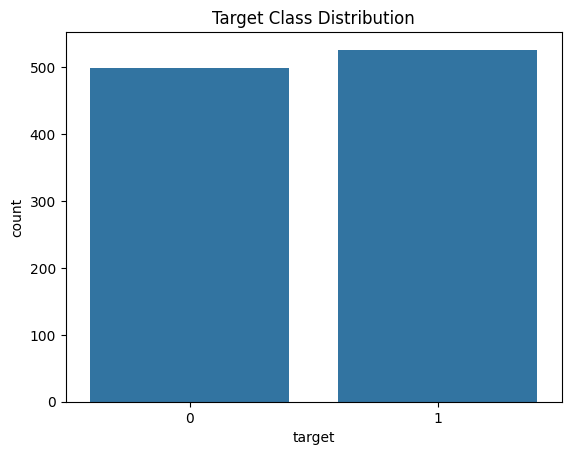

In [ ]:
print(df.info())
print(df.describe())

# Check target value distribution
sns.countplot(x='target', data=df)
plt.title("Target Class Distribution")
plt.show()


In [ ]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

print("✅ Model Trained")


✅ Model Trained


In [ ]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC/AUC


In [ ]:
print("🔹 Classification Report:")
print(classification_report(y_test, y_pred))

print(f"🔹 Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"🔹 Precision: {precision_score(y_test, y_pred):.2f}")
print(f"🔹 Recall: {recall_score(y_test, y_pred):.2f}")
print(f"🔹 ROC-AUC: {roc_auc_score(y_test, y_prob):.2f}")


🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

🔹 Accuracy: 0.80
🔹 Precision: 0.76
🔹 Recall: 0.87
🔹 ROC-AUC: 0.88


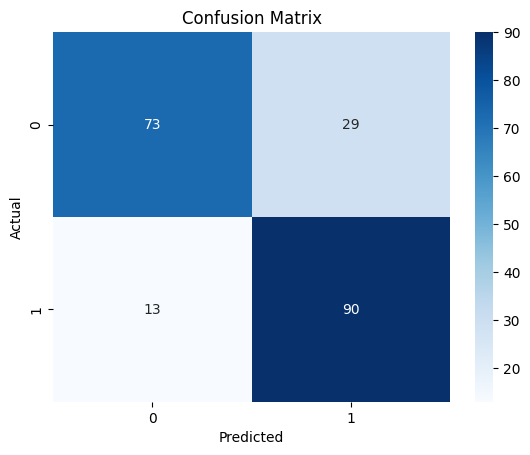

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


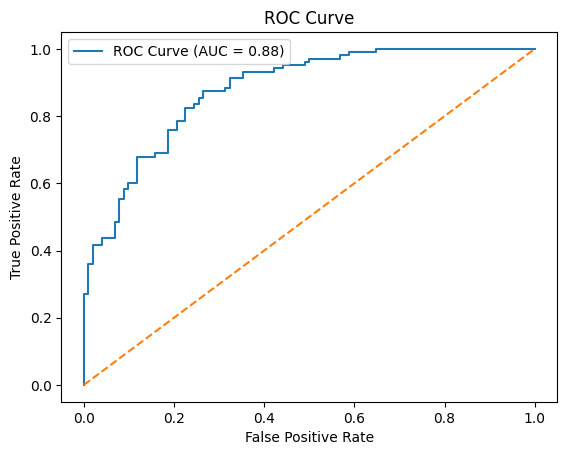

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [ ]:
threshold = 0.4
y_custom = (y_prob >= threshold).astype(int)

print(f"\n🔹 Classification Report (Threshold = {threshold}):")
print(classification_report(y_test, y_custom))



🔹 Classification Report (Threshold = 0.4):
              precision    recall  f1-score   support

           0       0.88      0.68      0.77       102
           1       0.74      0.91      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.79      0.79       205
weighted avg       0.81      0.80      0.79       205

